# Test-benchmark using fake data

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import warnings
warnings.filterwarnings("ignore")

# to remplace with pip install abench and uqmodels
path = '../'
sys.path.insert(1, path)
sys.path.insert(1, path+'src')
import abench as abench
import uqmodels as uqmodels
import abench.store as A_store
import matplotlib.pyplot as plt
import numpy as np
import pickle

if(True):
    from IPython.core.display import display, HTML
    display(HTML(
        '<style>'
            '#notebook { padding-top:0px !important; } ' 
            '.container { width:85% !important; } '
            '.end_space { min-height:0px !important; } '
        '</style>'
    ))
    

In [9]:
from abench.benchmark import analyse_data_generator
from uqmodels.store import read,write
dataset = 'syn' # 'syn'

if(dataset == 'real'):
    storing = path+'results/Benchmark_real_injection_inference/'
    list_name_norm = ['RF_dUQ','PNN_MCDP','PNN_DE','EDL']
    cv_list_norm = ['cv_0','cv_1','cv_0_bis1','cv_1_bis1']
    list_subset_name = ['Low-var','Mid-var','High-var']

elif(dataset == 'syn'):
    list_subset_name = ['nominal','aletered']
    storing = path+'results/Benchmark_synthetic_injection_inference/'
    list_name_norm = ['RF_dUQ','PNN_MCDP','PNN_DE','EDL']
    cv_list_norm = ['cv_0','cv_1','cv_0_bis1','cv_1_bis1']

dataset_generator = read(storing,['data','generator'])
analyse_data_generator(dataset_generator)

% train for each sub sample for each set
cv_0  len 60000 %train/test/drop: [10.   3.3] [25.   8.3] [40.  13.3]
cv_1  len 60000 %train/test/drop: [10.   3.3] [25.   8.3] [40.  13.3]
cv_0_bis1  len 60000 %train/test/drop: [10.   3.3] [25.   8.3] [40.  13.3]
cv_1_bis1  len 60000 %train/test/drop: [10.   3.3] [25.   8.3] [40.  13.3]


In [10]:
list_name = []
for i in range(len(list_name_norm)):
    list_name.append(list_name_norm[i])

list_name = []
for i in range(len(list_name_norm)):
    list_name.append(list_name_norm[i])
colors = ['black','red','green','blue','yellow']

In [11]:
from src.Benchmark_UQ import rmse, mae, average_coverage,sharpness,dEI,Gaussian_IC_errors
from abench.benchmark import Generic_metric,evaluate,barplot_ctx,analyse_data_generator
list_ctx_constraint=[(-2,None,0.5)] 

list_metrics = [Generic_metric(rmse,'Rmse_mean', mask=None,list_ctx_constraint=list_ctx_constraint,reduce=True),
               Generic_metric(average_coverage,"Cov", mask=None,list_ctx_constraint=list_ctx_constraint,reduce=True),
                Generic_metric(sharpness,"Aw_ALL", mask=None,list_ctx_constraint=list_ctx_constraint,reduce=True,type_var ="all"),
               Generic_metric(sharpness,"Aw_E", mask=None,list_ctx_constraint=list_ctx_constraint,reduce=True,type_var ="epistemic"),
               Generic_metric(sharpness,"Aw_A", mask=None,list_ctx_constraint=list_ctx_constraint,reduce=True,type_var ="aleatoric"),
               Generic_metric(dEI,"dEI", mask=None,list_ctx_constraint=list_ctx_constraint,reduce=True,alpha=0.9545,pen=0,type_var='all')]

dict_perf = evaluate(storing, list_name_norm, list_metrics,verbose=1,cv_list=cv_list_norm)

cv_0 len_train 8000
cv_1 len_train 8000
cv_0_bis1 len_train 8000
cv_1_bis1 len_train 8000
RF_dUQ  |time_fit : 3.38 time_pred : 8.43
Rmse_mean Train 0.245 ± 0.0 | TEST 0.436 ± 0.002
Cov Train 1.0 ± 0.0 | TEST 0.966 ± 0.001
Aw_ALL Train 1.568 ± 0.005 | TEST 1.809 ± 0.015
Aw_E Train 1.168 ± 0.006 | TEST 1.456 ± 0.017
Aw_A Train 1.012 ± 0.005 | TEST 1.027 ± 0.004
dEI Train -0.363 ± 0.005 | TEST -0.282 ± 0.007

PNN_MCDP  |time_fit : 491.54 time_pred : 57.54
Rmse_mean Train 0.4 ± 0.005 | TEST 0.445 ± 0.004
Cov Train 0.983 ± 0.001 | TEST 0.964 ± 0.002
Aw_ALL Train 1.842 ± 0.01 | TEST 1.877 ± 0.047
Aw_E Train 0.805 ± 0.004 | TEST 0.832 ± 0.027
Aw_A Train 1.628 ± 0.014 | TEST 1.651 ± 0.039
dEI Train -0.953 ± 0.01 | TEST -0.943 ± 0.012

PNN_DE  |time_fit : 2597.84 time_pred : 31.57
Rmse_mean Train 0.395 ± 0.002 | TEST 0.427 ± 0.001
Cov Train 0.969 ± 0.001 | TEST 0.951 ± 0.003
Aw_ALL Train 1.567 ± 0.022 | TEST 1.584 ± 0.025
Aw_E Train 0.223 ± 0.023 | TEST 0.236 ± 0.024
Aw_A Train 1.548 ± 0.019 | 

<IPython.core.display.Javascript object>


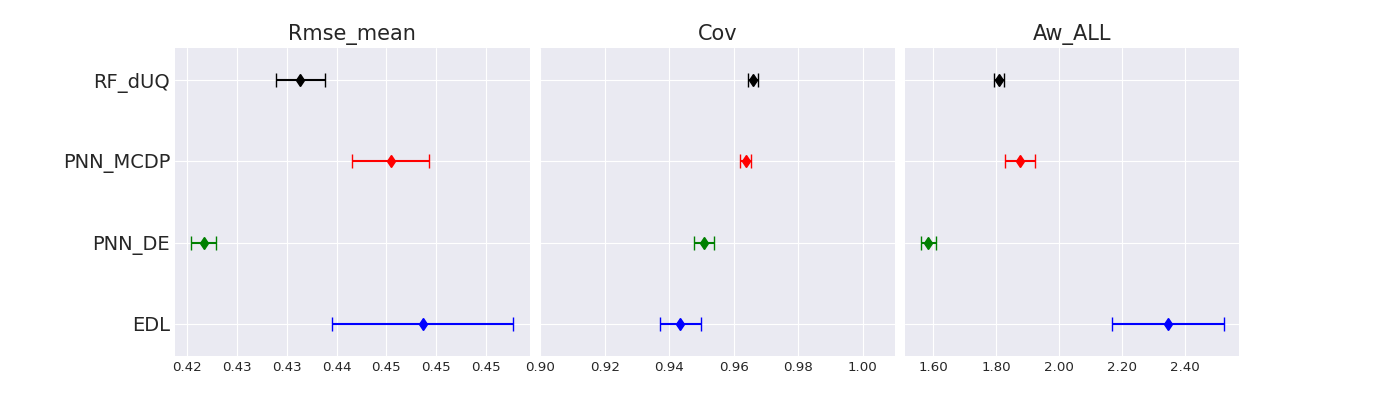

In [12]:
%matplotlib notebook

from  abench.benchmark import scatter_result, barplot_result
ylim =  [None, None]
barplot_result(dict_perf=dict_perf, 
               Name_metrics=['Rmse_mean','Cov','Aw_ALL'], 
               Name_candidates=list_name, 
               Names_contextes=None, 
               colors=colors, 
               target=[None,None],
               xlim=[None,(0.9,1.01),None,None,None],
               figsize=(14,4))

cv_0 len_train 8000
cv_1 len_train 8000
cv_0_bis1 len_train 8000
cv_1_bis1 len_train 8000
metriques : ['Rmse', 'Coverage', 'Aleatoric sharpness', 'Epistemic sharpness', 'dEInd']


<IPython.core.display.Javascript object>


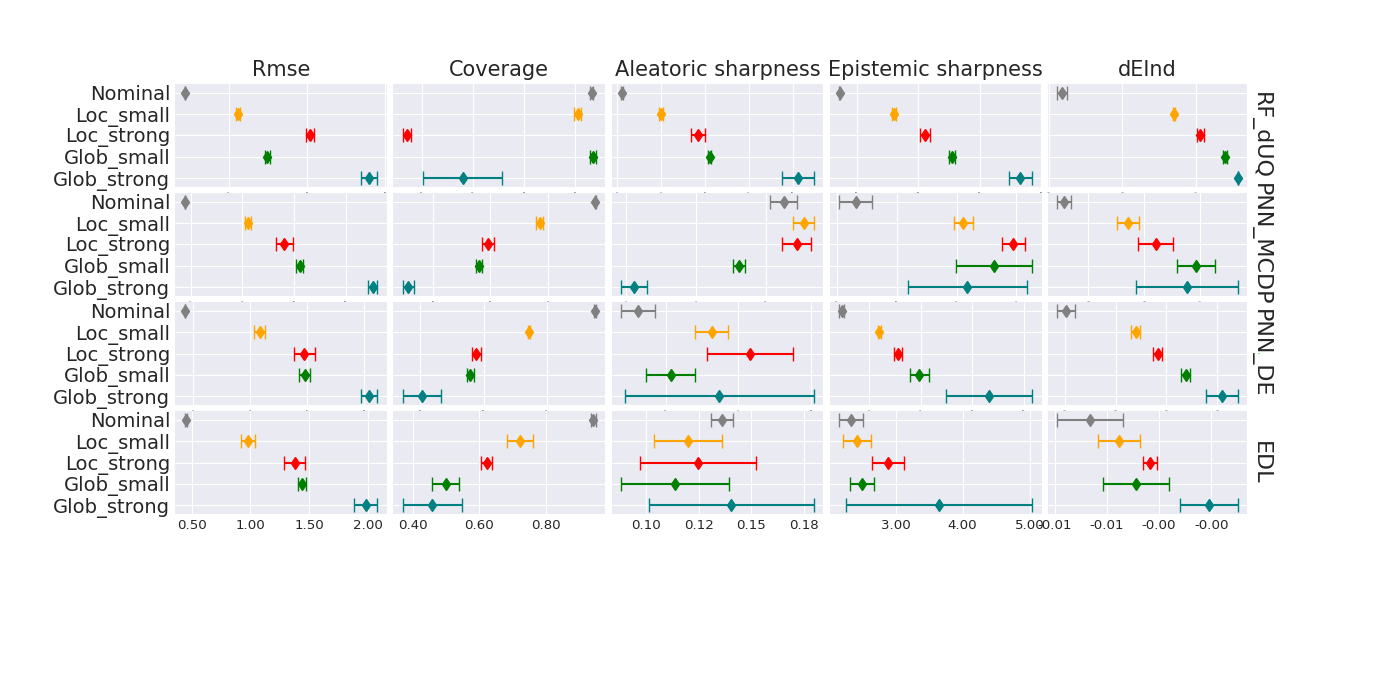

In [14]:
from abench.benchmark import Generic_metric,evaluate,barplot_ctx

from src.Benchmark_UQ import rmse, mae, average_coverage,sharpness,dEI
from abench.benchmark import Generic_metric,evaluate,barplot_ctx

list_metrics =[Generic_metric(rmse,'Rmse',mask=None,list_ctx_constraint=None,reduce=True),
               Generic_metric(average_coverage,"Coverage", mask=None,list_ctx_constraint=None,reduce=True),
               Generic_metric(sharpness,"Sharpness", mask=None,list_ctx_constraint=None,reduce=True),
               Generic_metric(sharpness,"Aleatoric sharpness", mask=None,list_ctx_constraint=None,reduce=True,type_var='aleatoric'),
               Generic_metric(sharpness,"Epistemic sharpness", mask=None,list_ctx_constraint=None,reduce=True,type_var='epistemic'),
               Generic_metric(dEI,"dEInd", mask=None,list_ctx_constraint=None,reduce=True,alpha=0.9545,pen=0,type_var='all')]

list_ctx = [-2]
list_ctx_name = ['']
dict_perf_ctx = evaluate(storing, list_name_norm, list_metrics,list_ctx,list_ctx_name,cv_list=cv_list_norm)


n_ctx = 5
ylim =  [None, None,None,None,None,None]
colors = ['grey','orange','red','green','teal']
list_ctx = ['Nominal','Loc_small','Loc_strong','Glob_small','Glob_strong']
for n,name_ctx in enumerate(list_ctx_name):
    name_ctx_metrics = ['Rmse'+name_ctx,'Coverage'+name_ctx,"Aleatoric sharpness"+name_ctx,"Epistemic sharpness"+name_ctx,"dEInd"+name_ctx]
    print('metriques :',name_ctx_metrics)
    size_h =  2+ n_ctx * len(list_name)/4
    ylim =  [None, None]
    
    barplot_result(dict_perf=dict_perf_ctx, 
                   Name_metrics=name_ctx_metrics,
                   Name_candidates= list_name, 
                   Names_contextes=list_ctx, 
                   colors=colors, 
                   target=[None,None],
                   xlim =  [None,None,None,None,None],
                   figsize=(14,size_h),
                   swap=(1,0,2))

<IPython.core.display.Javascript object>


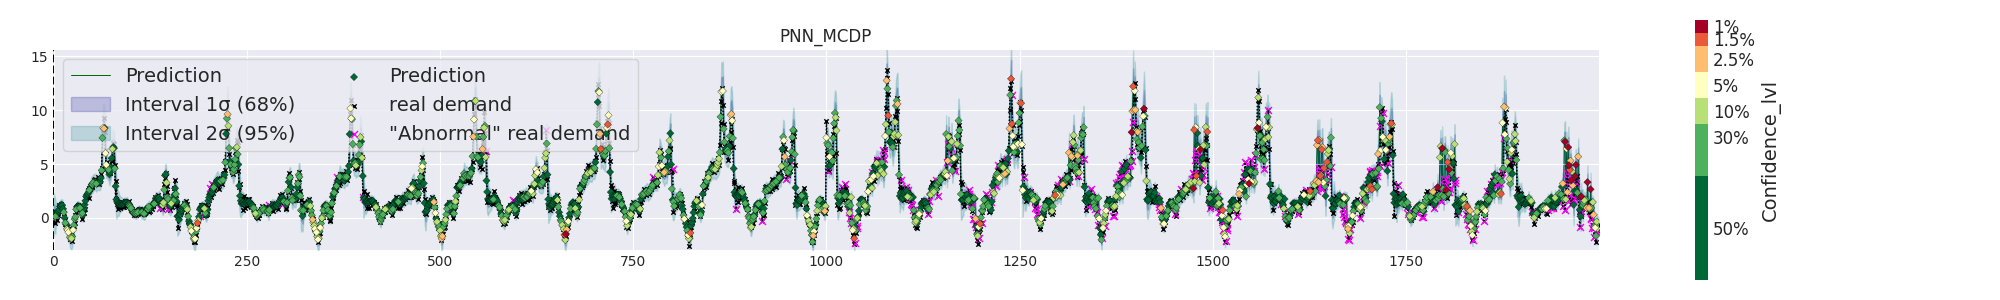

In [15]:
# Plot models results# Plot models results
import numpy as np

%matplotlib notebook

from abench.benchmark import plot_curve
from src.visu import uncertainty_plot

#Reoorder to show subseries
# Time reorderingstoringz
list_name=['PNN_MCDP']
c1,c2 = 1500,2500
k = 2
f_obs = np.concatenate([np.arange(c1,c2),np.arange(k*8473+c1,k*8473+c2)])
param={'mode_res':False,'f_obs':f_obs,'dim':0,'k':1,'var_min':(0.001,0.001),'ylim':None,'local_conf':True,'only_data':False,'list_name_subset':list_subset_name,'compare_deg':True}
plot_curve(storing, list_name, uncertainty_plot,'cv_0', plot_param=param,size=(20, 3))


<IPython.core.display.Javascript object>


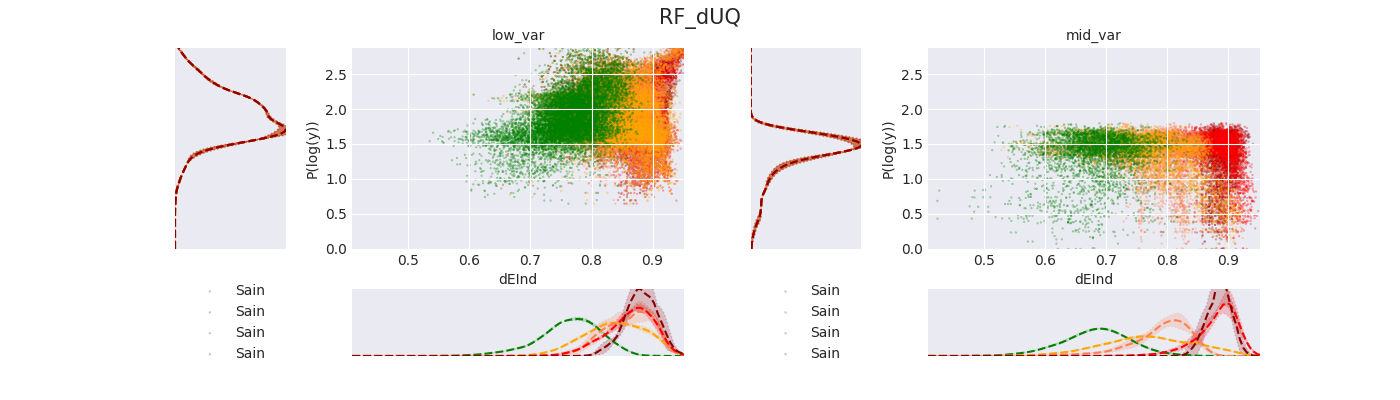

<IPython.core.display.Javascript object>


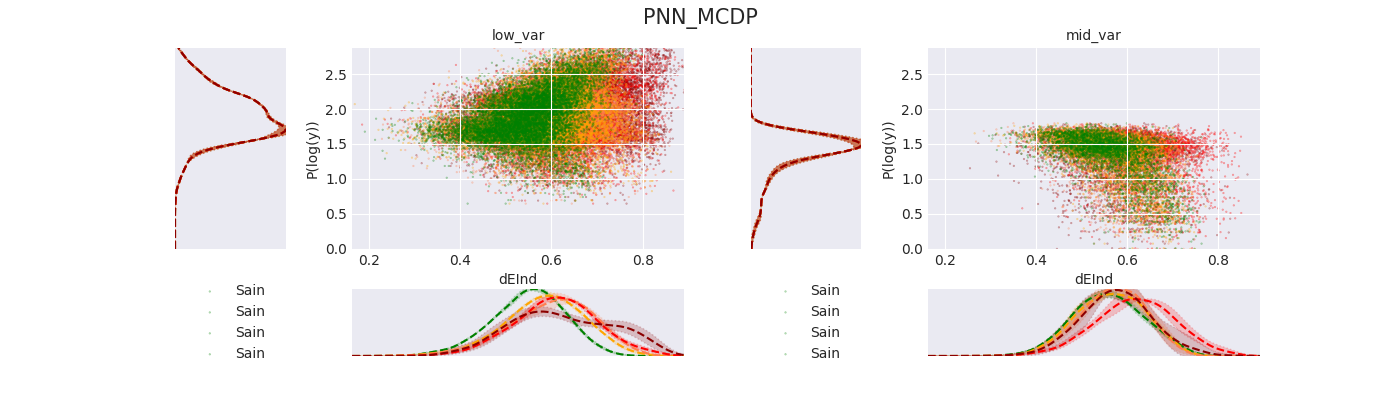

<IPython.core.display.Javascript object>


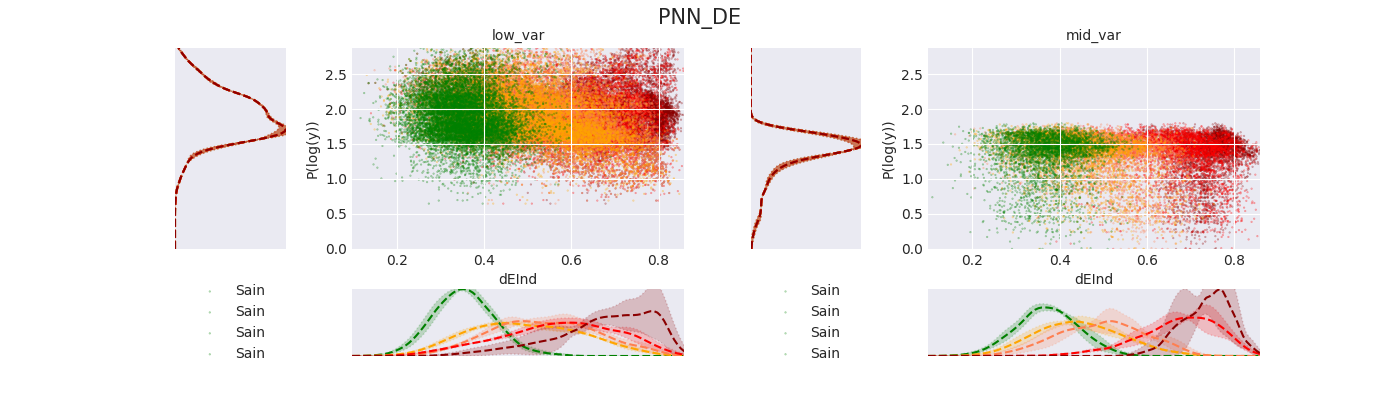

<IPython.core.display.Javascript object>


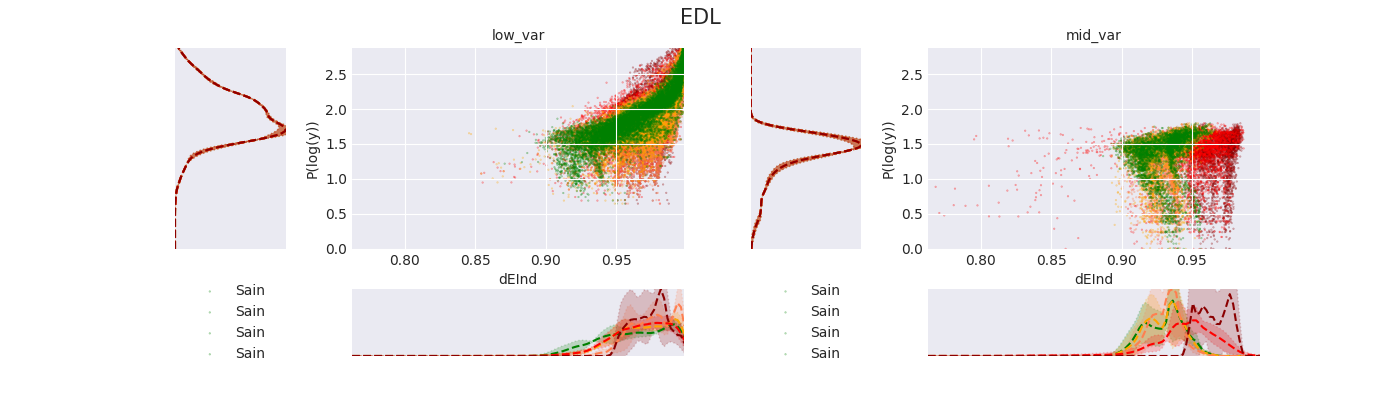

In [16]:
%matplotlib notebook
from src.Benchmark_UQ import plot_density_cv
from uqmodels.store import read
from uqmodels.utils import cut
from uqmodels.store import read
from uqmodels.utils import cut
from src.Benchmark_UQ import plot_density



list_list_cv_attack =  [[cv] for cv in cv_list_norm]
n_injection = 5
for name_model in list_name_norm:
    list_x_plot  = []
    list_x_plot_bis  = []
    list_x_plot_ter = []
    list_x_plot  = []
    list_y_plot = []
    list_context  = []
    
    from abench.store import get_dataset, get_model_result

    for cv,list_cv_attack in enumerate(list_list_cv_attack):
        cv_name = list_cv_attack[0]
        X,y,split,context,_,cv_name = get_dataset(storing,cv_name)
        output = get_model_result(storing,name_model,cv_name)
        ref = np.arange(len(output[0])) // (len(output[0])/n_injection)
        mask1 = context[:,-2]==0
        test = (split[mask1]==0)

        ref = np.arange(len(output[0])) // mask1.sum()
        mask1 = (ref==0) 
        mask2 = (ref==3)
        
        pred,var_A,var_E = output
        Ind_V = cut(y[:,0],0.00,1).reshape(n_injection,-1)
        Ind_A = cut(np.sqrt(var_A[:,0]),0.00,1).reshape(n_injection,-1)
        Ind_E = cut(np.sqrt(var_E[:,0]),0.00,1).reshape(n_injection,-1)
        dEInd = np.exp(-0.5 * np.log(1+(Ind_A/Ind_E)))

        label = ['Sain','attack loc small','attack loc strong','attack glob small','attack glob strong'] # List of labels for categories
        ctx_name = ['low_var','mid_var','high_var']
        cl = [ 'green', 'orange','coral', 'red', 'darkred']# List of colours for categories

        # Create numpy arrays for dummy x and y data
        list_x_plot.append(Ind_A[:,test])
        list_x_plot_bis.append(Ind_E[:,test])
        list_x_plot_ter.append(dEInd[:,test])
        list_y_plot.append(np.log(1-Ind_V[:,test].min()+Ind_V[:,test]))
        list_context.append(context[mask1][test,-1])

    from src.Benchmark_UQ import plot_density_cv
    #plot_density_cv(list_x_plot,list_y_plot,list_context,label,cl,ctx_name,suptitle=name_model,pb_cut=0.1,xlabel='var_A',ylabel='P(log(y))',same_x_scale=True,same_y_scale=True)
    #plot_density_cv(list_x_plot_bis,list_y_plot,list_context,label,cl,ctx_name,suptitle=name_model,pb_cut=0.1,xlabel='var_E',ylabel='P(log(y))',same_x_scale=True,same_y_scale=True)
    plot_density_cv(list_x_plot_ter,list_y_plot,list_context,label,cl,ctx_name,suptitle=name_model,pb_cut=0.1,xlabel='dEInd',ylabel='P(log(y))',same_x_scale=True,same_y_scale=True)

<IPython.core.display.Javascript object>


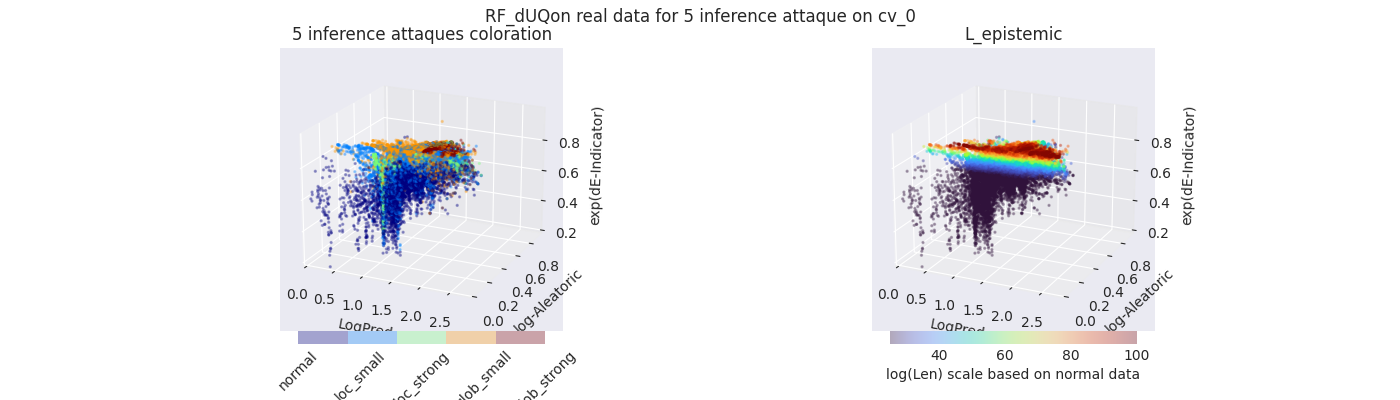

<IPython.core.display.Javascript object>


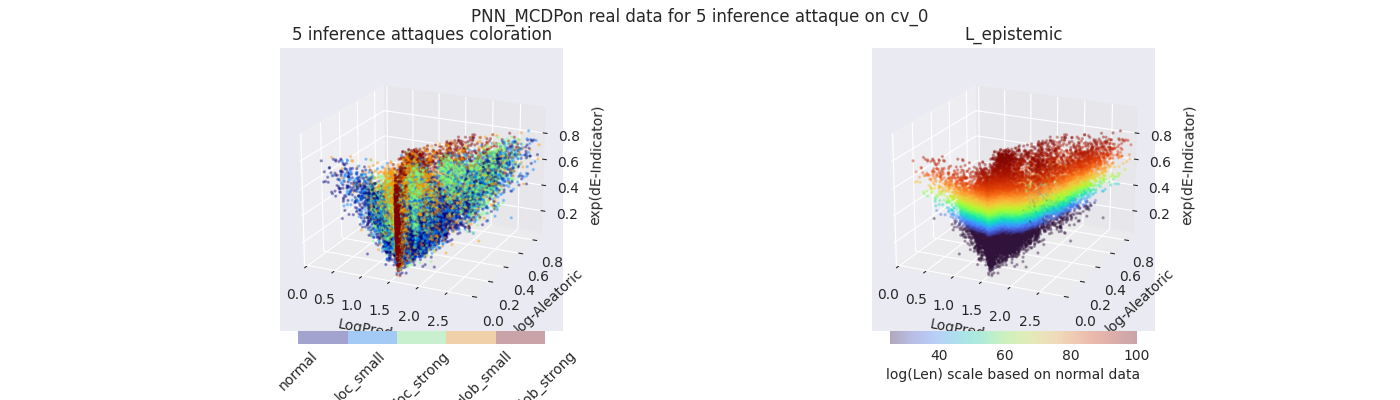

<IPython.core.display.Javascript object>


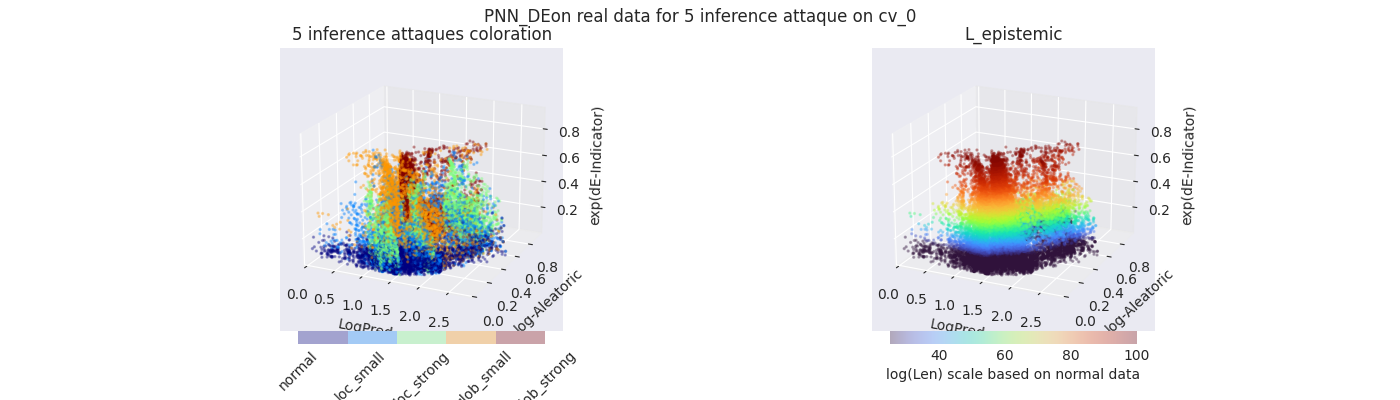

<IPython.core.display.Javascript object>


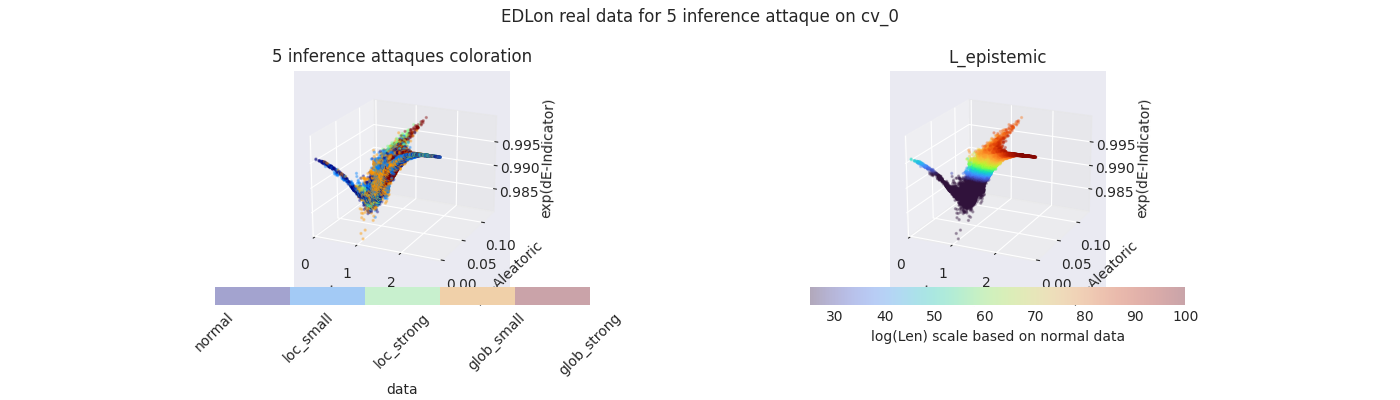

In [17]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from uqmodels.utils import cut
from abench.store import get_dataset,get_model_result

def log_scale(a):
    return(np.log(a-a.min(axis=0)+1))

def Q_colors(array):
    colors = np.zeros(len(array)) 
    for i in range(0,100):
        colors[array>np.quantile(array,(i/100))] = i
    return(colors)

storing = path+'results/Benchmark_synthetic_injection_inference/'
cv_name = cv_list_norm[0]
for name_model in list_name_norm:
    fig, ax = plt.subplots(1,2,subplot_kw=dict(projection='3d'),figsize=(14,4))
    plt.suptitle(name_model+'on real data for 5 inference attaque on cv_0')
    X,y,split,context,_,cv_name = get_dataset(storing,cv_name)
    output = get_model_result(storing,name_model,cv_name)
    test = (split==0)
    
    ctx_attack_info = np.arange(len(X))//(len(X)/5)
    pred  = output[0][:,0]
    var_A = np.maximum(output[1][:,0],0.0002)
    var_E = np.maximum(output[2][:,0],0.0001)
    
    indicator = -0.5 * np.log(1+(var_A/var_E))
    x, y, z = log_scale(pred),log_scale(var_A),np.exp(cut(indicator,0,1))
    
    vmin4 = 25 # np.quantile(indicator[train],0.005)
    vmax4 = 100
    indicator = Q_colors(indicator)
    ax[0].set_title('5 inference attaques coloration')
    ax[1].set_title('L_epistemic')
    
    im=ax[0].scatter(x[test], y[test], z[test], c=ctx_attack_info[test],s=2,alpha=0.3,cmap=plt.get_cmap('jet',5))
    cbar3 = plt.colorbar(im,ax=ax[0],cmap='jet',label="data",fraction=0.08,pad=0.00,shrink=0.50,orientation='horizontal')
    cbar3.set_ticks([0,1,2,3,4])
    cbar3.set_ticklabels(["normal","loc_small","loc_strong","glob_small","glob_strong"],rotation=45)

    im=ax[1].scatter(x[test], y[test], z[test], c=indicator[test],s=2,alpha=0.3,vmin=vmin4,vmax=vmax4,cmap='turbo')
    cbar = fig.colorbar(im,ax=ax[1],label="log(Len) scale based on normal data",fraction=0.08,pad=0.00,shrink=0.50,orientation='horizontal')
    elev, azim = 20,-65
    set_=[0,1]
    for j in set_:
        ax[j].view_init(elev, azim)
        ax[j].set_xlim3d(x.min(),x.max())
        ax[j].set_ylim3d(y.min(),y.max())
        ax[j].set_zlim3d(z.min(),z.max())
        ax[j].set_xlabel('LogPred') #'Log-(residu²/σ)')
        ax[j].set_ylabel('log-Aleatoric')
        ax[j].set_zlabel('exp(dE-Indicator)')
plt.tight_layout()
plt.show()

# Results of all inference variability injection :

<IPython.core.display.Javascript object>


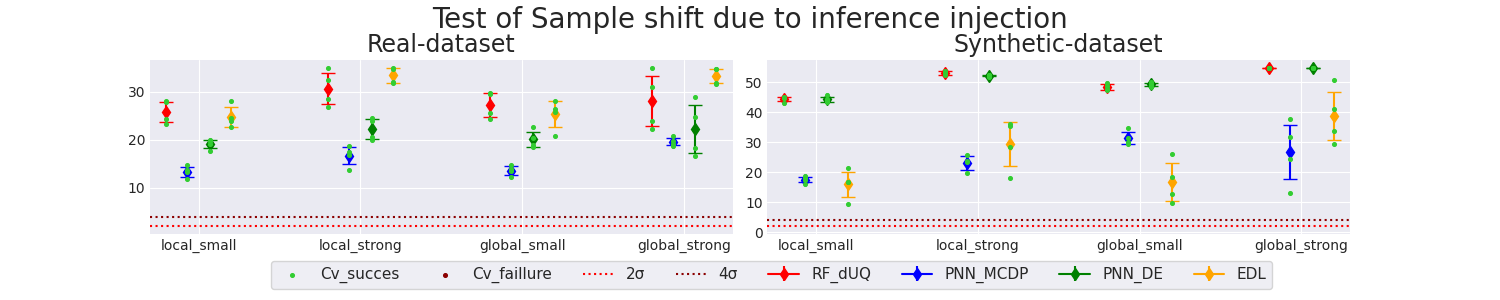

In [16]:
from src.Benchmark_UQ import plot_density_cv,compute_test_inference
import scipy
from uqmodels.store import read
from uqmodels.utils import cut
from uqmodels.store import read
from uqmodels.utils import cut
from src.Benchmark_UQ import plot_density
import matplotlib.pyplot as plt
import scipy.stats as sstats

%matplotlib notebook

list_res=[]
for i in range(2):
    if(i==0):
        storing = path+'results/Benchmark_real_injection_inference/'
        list_model = ['RF_dUQ','PNN_MCDP','PNN_DE','EDL']
    else:
        storing = path+'results/Benchmark_synthetic_injection_inference/'
        list_model = ['RF_dUQ','PNN_MCDP','PNN_DE','EDL']

    list_cv=['cv_0','cv_1','cv_0_bis1','cv_1_bis1']
    list_exp = ["loc_small","loc_strong","glob_small","glob_strong"]
    res = compute_test_inference(storing,list_exp,list_cv,list_model,n_injection=5)
    list_res.append(res)
    
from src.visu import Synthesis_dUQ_test_inference
list_model = ['RF_dUQ','PNN_MCDP','PNN_DE','EDL']
pos = [-0.2,-0.07,0.07,0.2]
list_exp = [["local_small","local_strong","global_small","global_strong"],["local_small","local_strong","global_small","global_strong"]]
subtitle = ['Real-dataset','Synthetic-dataset']
colors = ['red','blue','green','orange','cyan','lime']
Synthesis_dUQ_test_inference(list_res,list_model,pos,subtitle,list_exp,colors)